# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>


### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.


### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>


### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.


In [1]:
# %pip install --upgrade plotly


### Import Statements


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### Notebook Presentation


In [3]:
from pandas.plotting import register_matplotlib_converters
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


register_matplotlib_converters()


### Read the Data


In [4]:
df_yearly = pd.read_csv('datasets/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('datasets/monthly_deaths.csv',
                         parse_dates=['date'])


# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.

- What is the shape of df_yearly and df_monthly? How many rows and columns?
- What are the column names?
- Which years are included in the dataset?
- Are there any NaN values or duplicates?
- What were the average number of births that took place per month?
- What were the average number of deaths that took place per month?


In [5]:
print("--> SHAPE OF THE DATAFRAMES ARE:")
# Shape of the Yearly_DataFrame.
print("Yearly DataFrame has shape: ", df_yearly.shape)
# Shape of the Monthly_DataFrame.
print("Monthly DataFrame has shape: ", df_monthly.shape)


--> SHAPE OF THE DATAFRAMES ARE:
Yearly DataFrame has shape:  (12, 4)
Monthly DataFrame has shape:  (98, 3)


In [6]:
print("Columns Names in Both DataFrames are: ")

# Getting the Columns of Yearly DataFrame
print("Yearly_DataFrame: ", df_yearly.columns)

# Getting the Columns of Monthly DataFrame
print("Monthly_DataFrame: ", df_monthly.columns)


Columns Names in Both DataFrames are: 
Yearly_DataFrame:  Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Monthly_DataFrame:  Index(['date', 'births', 'deaths'], dtype='object')


In [7]:
# Which Years are included in the DataSet
print("'{}' Years are included in the df_yearly".format(df_yearly.year.unique()))
# I was unable to guess to also add the distinct years of monthly_DataFrame.
# The monthly_df is presorted with date so tail() can be used to get the last included Years.
print("\nTail of df_monthly --> \n", df_monthly.tail())

print("\n|--> The Two DFs Shows Data of Year 1841 to 1849 <---|")


'[1841 1842 1843 1844 1845 1846]' Years are included in the df_yearly

Tail of df_monthly --> 
          date  births  deaths
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

|--> The Two DFs Shows Data of Year 1841 to 1849 <---|


### Check for Nan Values and Duplicates


In [8]:
# Checking if df_yearly has any NA value in it.
print("df_yearly has any NA values? ", df_yearly.isna().values.any())
# Checking if df_monthly has any NA value in it.
print("df_monthly has any NA values? ", df_monthly.isna().values.any())


df_yearly has any NA values?  False
df_monthly has any NA values?  False


In [9]:
# Whether Both DataFrames has Duplicatd values or not?
print("df_yearly has any Duplicated values? ",
      df_yearly.duplicated().values.any())
print("df_monthly has any Duplicated values? ",
      df_monthly.duplicated().values.any())


df_yearly has any Duplicated values?  False
df_monthly has any Duplicated values?  False


### Descriptive Statistics


In [10]:
# Average Number of Births Per Month.
print(f"The Below description of df_monthly shows \n\
that there is {df_monthly.births.mean():.2f} and {df_monthly.deaths.mean():.2f}\nAverage \
number of Births and Deaths respectively. (Monthly)")
df_monthly.describe()


The Below description of df_monthly shows 
that there is 267.00 and 22.47
Average number of Births and Deaths respectively. (Monthly)


,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna?

- Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.

In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)


In [11]:
total_birth_deaths = df_yearly.agg(
    {'births': pd.Series.sum, 'deaths': pd.Series.sum})
maternal_death_rate = (total_birth_deaths[1]/total_birth_deaths[0])*100
print(f"In the 1840s:\n\
Total Births: {total_birth_deaths[0]}\n\
Total Deaths: {total_birth_deaths[1]}\n\n\
Hence, {maternal_death_rate:.2f}% of Maternal Deaths were there in Vienna in 1840s.")


In the 1840s:
Total Births: 37833
Total Deaths: 2680

Hence, 7.08% of Maternal Deaths were there in Vienna in 1840s.


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time


### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

- Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
- Set the range on the x-axis so that the chart lines touch the y-axes
- Add gridlines
- Use `skyblue` and `crimson` for the line colours
- Use a dashed line style for the number of deaths
- Change the line thickness to 3 and 2 for the births and deaths respectively.
- Do you notice anything in the late 1840s?


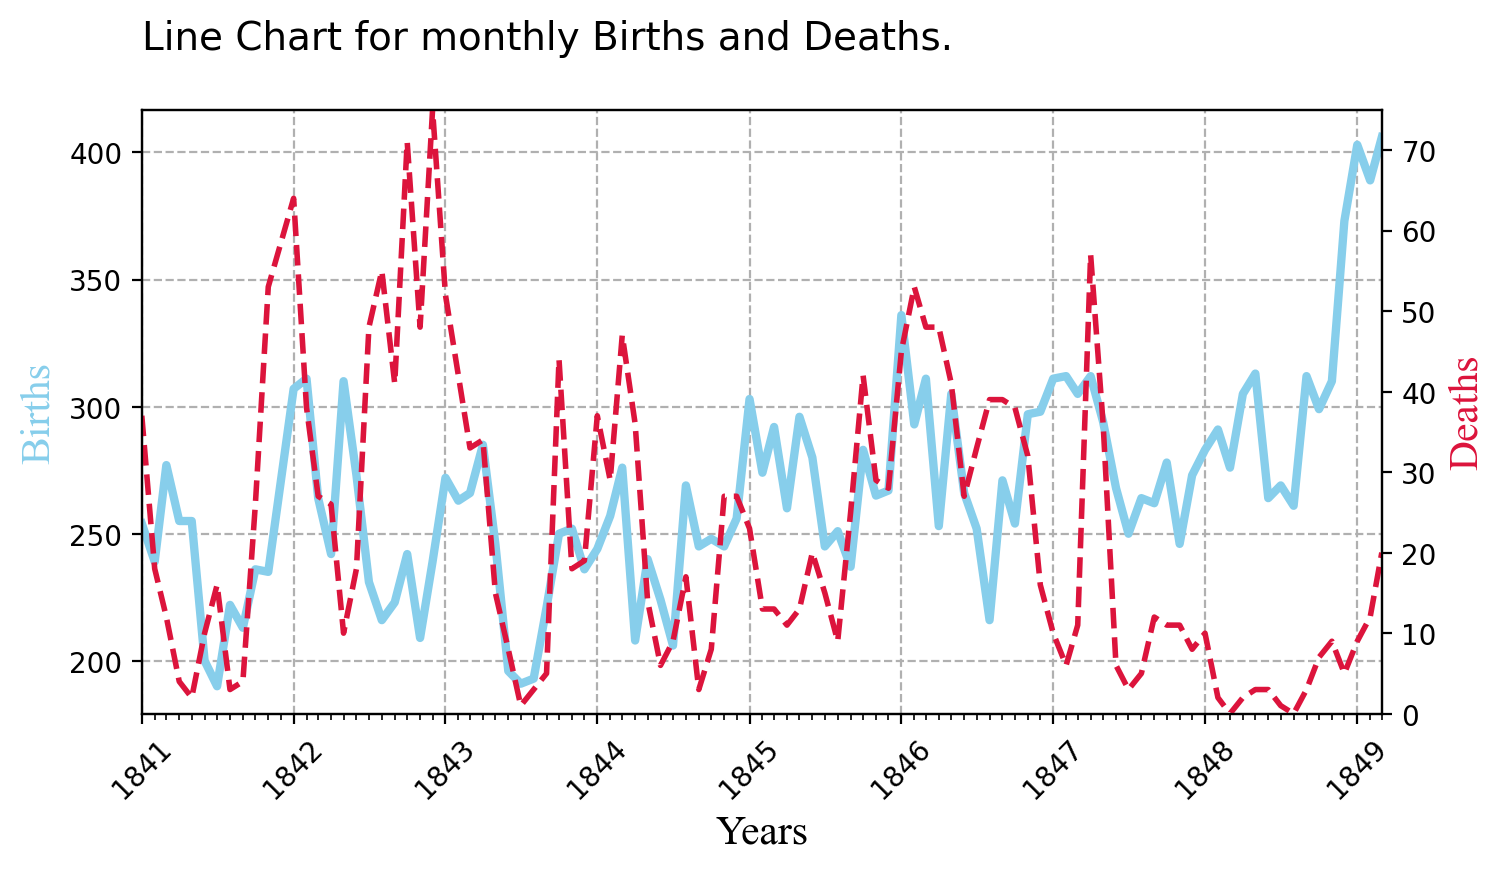

In [12]:
# Creating the line Chart For df_monthly.
plt.figure(figsize=(8, 4), dpi=200)
plt.title('Line Chart for monthly Births and Deaths.\n',
          fontsize=14, loc='left')
plt.xticks(rotation=45)
# Getting Hold of Two Different Axes (Y-axeses as twins).
ax1 = plt.gca()
ax2 = ax1.twinx()
# Plotting the Actual Data on both axeses.
ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths,
         color='crimson', linestyle='dashed', linewidth=2)

# Adding dashed grid to plot.
ax1.grid(linestyle='dashed')
# Setting Axes Labels.
ax1.set_xlabel("Years", color='Black', fontdict={
               'fontname': 'Times new roman', 'fontsize': 15})
ax1.set_ylabel("Births", color='skyblue', fontdict={
               'fontname': 'Times new roman', 'fontsize': 15})
ax2.set_ylabel("Deaths", color='crimson', fontdict={
               'fontname': 'Times new roman', 'fontsize': 15})
# Setting the xlim to put it touched to y-axeses were somewhat Difficult.
# But I have done it. (By Using the lim arguments as Strings)
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
# Set_ylim on deaths axis to start it touching the x-axis."

ax2.set_ylim([df_monthly.deaths.min(), df_monthly.deaths.max()])

# Adding Locators for every months in x-axis years data.
locator = mdates.MonthLocator()
ax1.xaxis.set_minor_locator(locator)

plt.show()


In [13]:
print("What we Find more by te Line-Plot is that\n\
After March 1847(Approx), the number of Maternal Deaths seems to have dropped\n\
despite an increasing number of births.")


What we Find more by te Line-Plot is that
After March 1847(Approx), the number of Maternal Deaths seems to have dropped
despite an increasing number of births.


# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.

- Which clinic is bigger or more busy judging by the number of births?
- Has the hospital had more patients over time?
- What was the highest number of deaths recorded in clinic 1 and clinic 2?


In [14]:
# Total Birth in Every Year Based on Two Different Clinics.
line_yearly_birth = px.line(data_frame=df_yearly,
                            x='year',
                            y='births',
                            color='clinic',
                            title='<em>Total Yearly Birth By Clinic.</em>',
                            height=450, width=900)
line_yearly_birth.show()


In [15]:
# Total Death in Every Year Based on Two Different Clinics.
line_yearly_death = px.line(data_frame=df_yearly,
                            x='year',
                            y='deaths',
                            color='clinic',
                            title='<em>Total Yearly Death By Clinic.</em>',
                            height=450, width=900)
line_yearly_death.show()


### Hence the Highest Number of Deaths Recorded was:-

#### Clinic 1 -> 518 || Clinic 2 -> 202


### Calculate the Proportion of Deaths at Each Clinic


**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.

- Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
- Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
- Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
- Which clinic has a higher proportion of deaths?
- What is the highest monthly death rate in clinic 1 compared to clinic 2?


In [16]:
# Adding new column named "pct_deaths" to hold the Death Percentage of each Year.
df_yearly['pct_deaths'] = (df_yearly.deaths/df_yearly.births)*100


In [17]:
# Average Maternal Death rate for both Clinics.
# Average Death rate for Clinic 1
print("Average Death rate for Clinic 1 --> ",
      df_yearly[df_yearly.clinic == 'clinic 1'].pct_deaths.mean().round(2))
# Average Death rate for Clinic 2
print("Average Death rate for Clinic 2 --> ",
      df_yearly[df_yearly.clinic == 'clinic 2'].pct_deaths.mean().round(2))


Average Death rate for Clinic 1 -->  9.85
Average Death rate for Clinic 2 -->  4.04


### Plotting the Proportion of Yearly Deaths by Clinic


In [18]:
# How the Percentage Varies Year over Year in Two Different Clinics?
# Creating Another Plotly Chart for This.
yearly_death_proportion = px.line(
    data_frame=df_yearly,
    x='year',
    y='pct_deaths',
    color='clinic',
    title='<em>Yearly Death Proportions by Different Clinics</em>',
    labels={
        "pct_deaths": "Death Percentage",
        "year": "Years"},
    height=450, width=900,
)

yearly_death_proportion.show()


In [19]:
print("Still, clinic 2 had a consistently **lower death rate** than clinic 1!\nThis is what puzzled and frustrated Dr Semmelweis")


Still, clinic 2 had a consistently **lower death rate** than clinic 1!
This is what puzzled and frustrated Dr Semmelweis


# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1847 (June). In fact, he ordered people to wash their hands with clorine (instead of water).


In [20]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')


**Challenge**:

- Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
- Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
- Calculate the average death rate prior to June 1847.
- Calculate the average death rate after June 1847.


In [21]:
# Adding new column named "pct_deaths" to hold the Death Percentage of each Month in df_monthly.
df_monthly['pct_deaths'] = (df_monthly.deaths/df_monthly.births)*100


In [22]:
# Creating Two Distinct DFs from "df_monthly" DF.
# Creating a DF for Data Before Dr. Semmelweis made Handwashing Mandatory.
df_mon_bef_handwashing = df_monthly[df_monthly.date < handwashing_start]
# Creating a DF for Data After Dr. Semmelweis made Handwashing Mandatory.
df_mon_af_handwashing = df_monthly[df_monthly.date > handwashing_start]


In [23]:
# Average Death Rate prior to June 1847 (Handwashing compulsion)
print(
    f"\nThe Average Death Rate Before Handwashing compulsion was: {df_mon_bef_handwashing.pct_deaths.mean():.2f}")
# Average Death Rate After June 1847 was -->
print(
    f"The Average Death Rate After Handwashing compulsion was: {df_mon_af_handwashing.pct_deaths.mean():.2f}\n")
print("--> The Average Death Rate After Making Handwashing mandatory was dropped much lower\n\
And hence, it was a Great Achievement for Dr. Semmelweis for his Research.")



The Average Death Rate Before Handwashing compulsion was: 10.50
The Average Death Rate After Handwashing compulsion was: 2.10

--> The Average Death Rate After Making Handwashing mandatory was dropped much lower
And hence, it was a Great Achievement for Dr. Semmelweis for his Research.


### Calculate a Rolling Average of the Death Rate


**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

_Hint_: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.


In [24]:
# Using agg to seprately applying Mean Function to "pct_deaths" column.
# Hence, We've got hold of rolled 6-month average "Death Rate"

roll_df = df_mon_bef_handwashing.set_index('date').rolling(
    window=6).agg({'pct_deaths': pd.Series.mean})


In [26]:
# Showing the rolled DataFrame.
roll_df[5:10]


,pct_deaths
date,
1841-06-01,5.63
1841-07-01,4.61
1841-08-01,3.58
1841-09-01,3.17
1841-10-01,4.74


### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

- Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
- Show the monthly death rate before handwashing as a thin dashed black line.
- Show the moving average as a thicker, crimon line.
- Show the rate after handwashing as a skyblue line with round markers.
- Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.


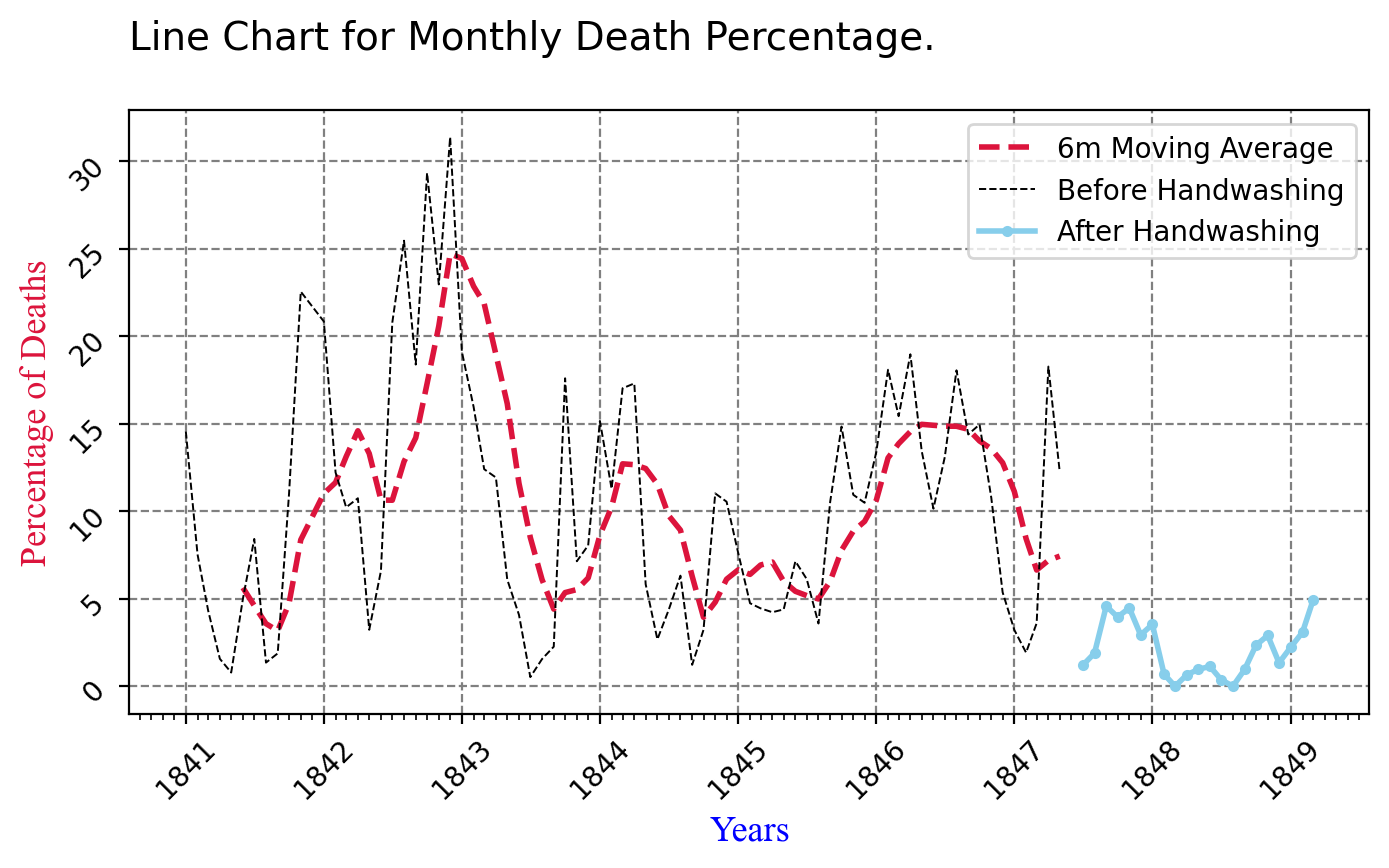

In [85]:
# Creating the line Chart For Monthly Death Rate.
plt.figure(figsize=(8, 4), dpi=200)
plt.title('Line Chart for Monthly Death Percentage.\n',
          fontsize=14, loc='left')
# Formating ticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Plotting the Given Data on the plot with same X-axis.
plt.plot(roll_df.index, roll_df.pct_deaths,
                   color='crimson', linewidth=2, linestyle='--')

plt.plot(df_mon_bef_handwashing.date, df_mon_bef_handwashing.pct_deaths,
                   color='black', linewidth=0.7, linestyle='--')

plt.plot(df_mon_af_handwashing.date, df_mon_af_handwashing.pct_deaths,
                   color='skyblue', marker='.', linewidth=2)


# Adding dashed grid to plot.
plt.grid(linestyle='dashed', color='grey')

# Setting Axes Labels.
plt.xlabel("Years", fontdict={
           'size': 13, 'fontfamily': 'Times New Roman', "color": 'blue'})
plt.ylabel("Percentage of Deaths", fontdict={
           'size': 13, 'fontfamily': 'Times New Roman', "color": 'crimson'})

# Adding Locators for every months in x-axis years data.
locator = mdates.MonthLocator()
plt.gca().xaxis.set_minor_locator(locator)

# Adding a Legend to all the Axeses.
plt.legend(['6m Moving Average', 'Before Handwashing', 'After Handwashing'])

# Showing the Plot.
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:

- What was the average percentage of monthly deaths before handwashing?
- What was the average percentage of monthly deaths after handwashing was made obligatory?
- By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
- How do these numbers compare to the average for all the 1840s that we calculated earlier?
- How many times lower are the chances of dying after handwashing compared to before?


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**:

- Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
- Then use plotly to create box plot of the data before and after handwashing.
- How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?


### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

- Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
- The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
- Make the histograms slighlty transparent
- Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
- Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.


### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

- Use the `shade` parameter to give your two distributions different colours.
- What weakness in the chart do you see when you just use the default parameters?
- Use the `clip` parameter to address the problem.


### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

- Import `stats` from scipy
- Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
- Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>
